In [1]:
import split_folders

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Dense, Flatten

Using TensorFlow backend.


In [2]:
#split_folders.ratio(r'C:\Users\Administrator\Desktop\Folders\Term-3\AI\data\Health Map Diagnostics_Ranchi_X-ray Images', 
#                    output=r'C:\Users\Administrator\Desktop\Folders\Term-3\AI\data\X_ray_split', 
#                    seed=1337, ratio=(.8, .2))

In [3]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## accuracy(train_acc: 98.42 and test_acc:85.71  for 15 epochs)


In [4]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'relu', units=64))


model.add(Dense( activation = 'sigmoid', units=1)) 

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
        r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/data/X_ray_split/train',
        target_size=(64,64),
        class_mode='binary')

test_set = train_datagen.flow_from_directory(
        r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/data/X_ray_split/test',
        target_size=(64,64),
        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


In [9]:
model.fit_generator(
        train_set,
        epochs=15,
        validation_data=test_set)

model.fit_generator(train_set)

Epoch 1/15
13/13 [==============================] - 136s 10s/step - loss: 0.6805 - acc: 0.5627 - val_loss: 0.6798 - val_acc: 0.5604
Epoch 2/15
13/13 [==============================] - 126s 10s/step - loss: 0.6694 - acc: 0.5768 - val_loss: 0.6684 - val_acc: 0.6154
Epoch 3/15
13/13 [==============================] - 131s 10s/step - loss: 0.6664 - acc: 0.5988 - val_loss: 0.6681 - val_acc: 0.5495
Epoch 4/15
13/13 [==============================] - 131s 10s/step - loss: 0.6487 - acc: 0.6154 - val_loss: 0.6890 - val_acc: 0.5714
Epoch 5/15
13/13 [==============================] - 135s 10s/step - loss: 0.6530 - acc: 0.5983 - val_loss: 0.6988 - val_acc: 0.5824
Epoch 6/15
13/13 [==============================] - 136s 10s/step - loss: 0.6483 - acc: 0.6226 - val_loss: 0.6836 - val_acc: 0.5495
Epoch 7/15
13/13 [==============================] - 129s 10s/step - loss: 0.6444 - acc: 0.5938 - val_loss: 0.6698 - val_acc: 0.5824
Epoch 8/15
13/13 [==============================] - 127s 10s/step - loss: 0.

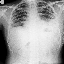

In [10]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img(r'C:/Users/Administrator/Desktop/Folders/Term-3/AI/data/X_ray_split/inference/abnormal70.jpg'
                           ,target_size =(64,64))

test_image

In [11]:
## Convert image to array
test_image = image.img_to_array(test_image)

test_image=test_image.reshape(1,64, 64, 3)

In [12]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

result

array([[1.]], dtype=float32)

In [13]:
label_map = (train_set.class_indices)
print(label_map)

{'Abnormal Reports': 0, 'Normal Reports': 1}


In [14]:
## Class label 

if result == 0:
    prediction = 'Abnormal Reports'
else:
    prediction = 'Normal Reports'

In [15]:
prediction

'Normal Reports'